In [64]:
conda install -c conda-forge jupyterthemes


Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\jaika\anaconda3

  added / updated specs:
    - jupyterthemes



The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38haa244fe_2         3.1 MB  conda-forge
    jupyterthemes-0.20.0       |             py_1         6.1 MB  conda-forge
    lesscpy-0.15.0             |     pyhd8ed1ab_0          38 KB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         9.2 MB

The following NEW packages will be INSTALLED:

  jupyterthemes      conda-forge/noarch::jupyterthemes-0.20.0-py_1
  lesscpy            conda-forge/noarch::lesscpy-0.15.0-pyhd8ed1ab_0
  pyt

In [44]:
conda install pillow

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\jaika\anaconda3

  added / updated specs:
    - pillow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38haa95532_0         2.9 MB
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following packages will be UPDATED:

  conda                                4.9.2-py38haa95532_0 --> 4.10.3-py38haa95532_0




conda-4.10.3         | 2.9 MB    |            |   0% 
conda-4.10.3         | 2.9 MB    | 1          |   2% 
conda-4.10.3         | 2.9 MB    | ####4      |  45% 
conda-4.10.3         | 2.9 MB    | ########## | 100% 
conda-4.10.3         | 2.9 MB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: .

In [3]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import PIL 
from PIL import Image

error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


TypeError: Image data of dtype object cannot be converted to float

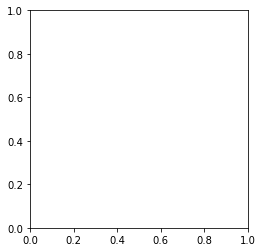

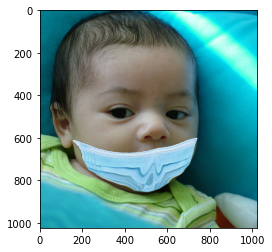

In [18]:
Datadirectory = "Dataset/"
Classes = ["Face_Mask", "No_Mask"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

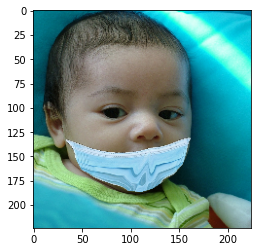

In [14]:
img_size = 224

new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
training_Data = [ ]

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array, class_num])

            except Exception as e:
                pass
            

In [20]:
create_training_Data()

In [21]:
print(len(training_Data))

1928


In [97]:
import random
random.shuffle(training_Data)

In [25]:
X = []
y = []

for features, label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [26]:
X.shape


(1928, 224, 224, 3)

In [27]:
X = X/255.0

In [28]:
Y = np.array(y)

In [29]:
import pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X,pickle_out)
pickle_out.close()
pickle_out =open("y.pickle", "wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [30]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [31]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

In [32]:
model = tf.keras.applications.mobilenet.MobileNet()

In [118]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [33]:
base_input = model.layers[0].input

In [34]:
base_output = model.layers[-4].output

In [35]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [36]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [124]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [37]:
new_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [38]:
new_model.fit(X,Y, epochs = 2, validation_split = 0.1)

Epoch 1/2
55/55 [==============================] - 226s 4s/step - loss: 0.0313 - accuracy: 0.9914 - val_loss: 1.3608 - val_accuracy: 0.8653
Epoch 2/2
55/55 [==============================] - 203s 4s/step - loss: 0.0027 - accuracy: 0.9983 - val_loss: 3.7137e-13 - val_accuracy: 1.0000


In [42]:
new_model.save('my_model3.h5')

In [44]:
new_model = tf.keras.models.load_model('my_model3.h5')

In [64]:
frame = cv2.imread('C:\\Users\\jaika\\DataSet\\Face_Mask\\00002_Mask_Mouth_Chin.jpg')

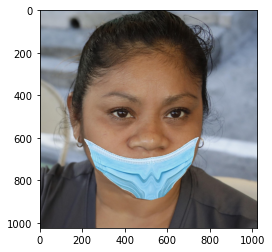

In [65]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [70]:
final_image = cv2.resize(frame, (224,224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [71]:
Predictions = new_model.predict(final_image)

In [72]:
Predictions


array([[1.741529e-08]], dtype=float32)

In [96]:
frame = cv2.imread('C:\\Users\\jaika\\Downloads\\SadWomenFace.jpg')

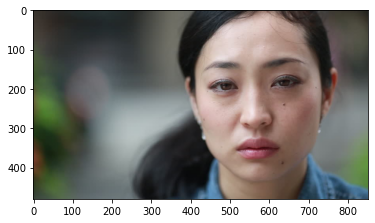

In [97]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [98]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [99]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [100]:
gray.shape


(480, 852)

In [101]:
faces = faceCascade.detectMultiScale(gray, 1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x: x+w]
    roi_color = frame[y:y+h, x: x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print ("Face not Detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex: ex + ew] 


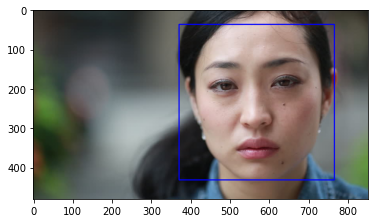

In [103]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

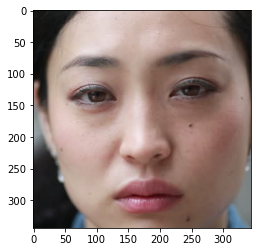

In [104]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [105]:
final_image = cv2.resize(frame, (224,224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [106]:
Predictions = new_model.predict(final_image)

In [107]:
Predictions

array([[1.]], dtype=float32)